In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("df_ff_factors_010225.csv")
df = df.drop(columns=["Unnamed: 0","crsp_portno"])
df = df.sort_values(by='date')
df.columns

Index(['crsp_fundno', 'date', 'mth_return', 'exp_ratio', 'turn_ratio',
       'normalised_flow', 'gdp_to_debt_ratio', 'gdp_growth_rate', 'unm_rate',
       'infl_rate', 'mktrf', 'smb', 'hml', 'rmw', 'cma', 'rf', 'umd',
       'excess_return', 'rolling_sharpe', 'mkt_return', 'rolling_alpha_3f',
       'rolling_alpha_4f', 'rolling_alpha_5f', 'shortrun_momentum'],
      dtype='object')

In [2]:
df.describe()

,crsp_fundno,mth_return,exp_ratio,turn_ratio,normalised_flow,gdp_to_debt_ratio,gdp_growth_rate,unm_rate,infl_rate,mktrf,...,cma,rf,umd,excess_return,rolling_sharpe,mkt_return,rolling_alpha_3f,rolling_alpha_4f,rolling_alpha_5f,shortrun_momentum
count,54718.000000,54718.000000,54718.000000,54718.000000,54712.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,...,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000
mean,25847.143774,0.010032,0.013245,1.030010,1.121664,95.332335,2.151457,5.734164,2.592239,0.007829,...,0.001288,0.001162,0.001407,0.010020,0.853689,0.012268,0.001627,0.001585,0.003240,-0.002178
std,20021.936361,0.065036,0.006393,1.888697,71.530349,21.748174,1.897339,2.069179,1.781960,0.045610,...,0.021984,0.001469,0.045830,0.065036,2.775987,0.059404,0.023437,0.023533,0.023922,0.022838
min,2756.000000,-0.535195,0.000000,0.000000,-12693.330000,54.032000,-2.576500,3.400000,0.090000,-0.172300,...,-0.072000,0.000000,-0.343000,-0.535208,-88.840055,-0.264049,-0.319378,-0.319378,-0.319378,-0.235318
25%,12043.000000,-0.024254,0.008600,0.280000,-0.068772,80.280000,1.819500,4.000000,1.500000,-0.019600,...,-0.012300,0.000000,-0.020200,-0.024279,-0.019346,-0.020737,-0.005824,-0.005809,-0.004775,-0.012086
50%,19869.000000,0.013020,0.012400,0.500000,-0.002703,100.973000,2.457600,5.100000,2.110000,0.011900,...,-0.000600,0.000300,0.004400,0.013005,0.798430,0.018009,0.001170,0.000803,0.002249,-0.001809
75%,30567.000000,0.048310,0.017800,1.040000,0.048972,106.886000,2.945600,6.700000,2.960000,0.034000,...,0.012900,0.001800,0.027400,0.048297,1.711741,0.049571,0.007886,0.007632,0.009925,0.008017
max,95211.000000,0.631549,0.037900,24.130000,3081.850000,132.815000,5.800200,14.700000,7.040000,0.136500,...,0.090700,0.005600,0.182000,0.631548,480.695813,0.249812,0.379525,0.379525,0.379525,0.230276


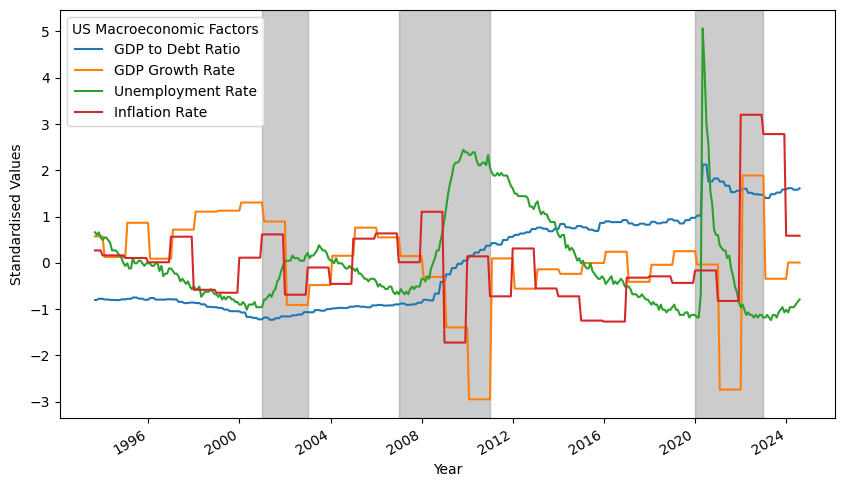

In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

macro_factors = df[['date', 'gdp_to_debt_ratio', 'gdp_growth_rate', 'unm_rate', 'infl_rate']]
macro_factors = macro_factors.drop_duplicates().set_index('date')
macro_factors = macro_factors.rename(columns={'gdp_to_debt_ratio': 'GDP to Debt Ratio',
                                              'gdp_growth_rate': 'GDP Growth Rate',
                                              'unm_rate': 'Unemployment Rate',
                                              'infl_rate': 'Inflation Rate'})

# Convert index to datetime
macro_factors.index = pd.to_datetime(macro_factors.index)

# Standardize the data
scaler = StandardScaler()
macro_factors_scaled = pd.DataFrame(scaler.fit_transform(macro_factors),
                                    index=macro_factors.index,
                                    columns=macro_factors.columns)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
macro_factors_scaled.plot(ax=ax)

# Format x-axis to show only years
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.xaxis.set_major_locator(mdates.YearLocator(4))

# Labels and legend
plt.xlabel('Year')
plt.ylabel('Standardised Values')
plt.legend(title='US Macroeconomic Factors')
plt.grid(False)

ax.axvspan('2001-01-01', '2002-12-31', color='gray', alpha=0.4)
ax.axvspan('2007-01-01', '2010-12-31', color='gray', alpha=0.4)
ax.axvspan('2020-01-01', '2022-12-31', color='gray', alpha=0.4)

plt.show()

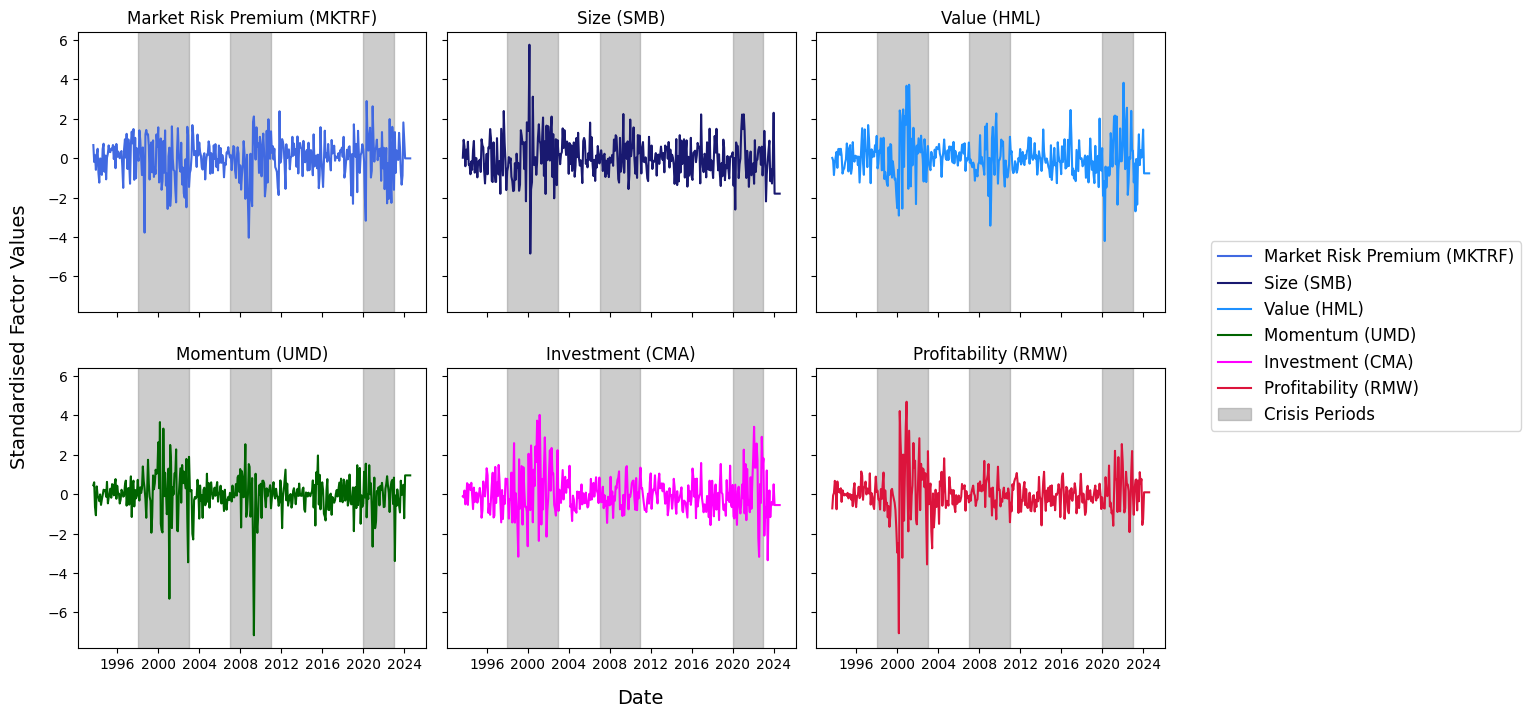

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Plotting of FF Factors
ff_factors = df[['date','mktrf','smb','hml','rmw','cma','umd']]
ff_factors = ff_factors.drop_duplicates()
ff_factors.set_index('date', inplace=True)
# ff_factors = ff_factors.rename(columns={'mktrf':'Market Risk Premium','smb':'Size','hml':'Value','rmw':'Profitability','cma':'Investment','umd':'Momentum'})

# Plotting
# plt.figure(figsize=(10, 6))

scaler = StandardScaler()
ff_factors_scaled = pd.DataFrame(scaler.fit_transform(ff_factors), 
                                    index=ff_factors.index, 
                                    columns=ff_factors.columns)

ff_factors_scaled.index = pd.to_datetime(ff_factors_scaled.index)
# plt.plot(ff_factors_scaled.index, ff_factors_scaled['mktrf'], label='Market Risk Premium', color='royalblue', linestyle='-')
# plt.plot(ff_factors_scaled.index, ff_factors_scaled['smb'], label='Size', color='midnightblue', linestyle='--')
# plt.plot(ff_factors_scaled.index, ff_factors_scaled['hml'], label='Value', color='dodgerblue', linestyle='-.')

# # Group 2: 'umd' - Green color with a solid line
# plt.plot(ff_factors_scaled.index, ff_factors_scaled['umd'], label='Momentum', color='darkgreen', linestyle='-')

# # Group 3: 'cma', 'rmw' - Red color with different line styles
# plt.plot(ff_factors_scaled.index, ff_factors_scaled['cma'], label='Investment', color='magenta', linestyle='--')
# plt.plot(ff_factors_scaled.index, ff_factors_scaled['rmw'], label='Profitability', color='crimson', linestyle='-')

# plt.axvspan('1998-01-01', '2002-12-31', color='gray', alpha=0.4, label='Crisis Periods')
# plt.axvspan('2007-01-01', '2010-12-31', color='gray', alpha=0.4)
# plt.axvspan('2020-01-01', '2022-12-31', color='gray', alpha=0.4)
# # Adding labels and legend
# plt.xlabel('Date')
# plt.ylabel('Factor Values')
# # plt.title('FF Factors Over Time')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.grid(False)
# plt.show()
# ff_factors.index

# Define factors with labels and colors
factors = {
    'mktrf': ('Market Risk Premium (MKTRF)', 'royalblue'),
    'smb': ('Size (SMB)', 'midnightblue'),
    'hml': ('Value (HML)', 'dodgerblue'),
    'umd': ('Momentum (UMD)', 'darkgreen'),
    'cma': ('Investment (CMA)', 'magenta'),
    'rmw': ('Profitability (RMW)', 'crimson')
}

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharex=True, sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Store handles and labels for compiled legend
lines = []  
labels = []

for i, (factor, (label, color)) in enumerate(factors.items()):
    ax = axes[i]
    
    # Plot factor time series and store line handle
    line, = ax.plot(ff_factors_scaled.index, ff_factors_scaled[factor], color=color, label=label)
    lines.append(line)
    labels.append(label)
    
    # Add crisis periods (only store the first one for legend)
    if i == 5:
        crisis_patch = plt.Rectangle((0, 0), 1, 1, color='gray', alpha=0.4, label='Crisis Periods')
        lines.append(crisis_patch)
        labels.append('Crisis Periods')
    
    ax.axvspan('1998-01-01', '2002-12-31', color='gray', alpha=0.4)
    ax.axvspan('2007-01-01', '2010-12-31', color='gray', alpha=0.4)
    ax.axvspan('2020-01-01', '2022-12-31', color='gray', alpha=0.4)
    
    # Labels and title
    ax.set_title(label, fontsize=12)
    ax.grid(False)

# Add a compiled legend on the right outside the plot
fig.legend(handles=lines, labels=labels, loc='center left', bbox_to_anchor=(0.875, 0.5), fontsize=12)

# Set common labels
fig.text(0.5, 0.04, 'Date', ha='center', fontsize=14)
fig.text(0.08, 0.5, 'Standardised Factor Values', va='center', rotation='vertical', fontsize=14)

# Adjust layout for clarity
plt.subplots_adjust(right=0.85, hspace=0.2, wspace=0.06)
# plt.tight_layout(rect=[0, 0, 1, 0.01])  # Adjust space for legend
plt.show()